In [6]:
import numpy as np
import pandas as pd

import os

In [7]:
ravdess = "/Users/muchacho/Desktop/master_code/dataset/ravdess/audio_speech_actors_01-24"

In [8]:
ravdess_dataset_actors = os.listdir(ravdess)

In [9]:
emotion_file = []
path_file = []

In [10]:
for directory in ravdess_dataset_actors:
    if not directory.startswith('.'):
        actor = os.listdir(ravdess + '/' + directory)
        for file in actor:
            filename = file.split('.')[0]
            emotion = filename.split('-')
            
            emotion_file.append(int(emotion[2]))
            path_file.append(ravdess + '/' + directory + '/' + file)
            
emotion_dataframe = pd.DataFrame(emotion_file, columns = ['Emotions'])
path_dataframe = pd.DataFrame(path_file, columns = ['Paths'])
ravdess_dataframe = pd.concat([emotion_dataframe, path_dataframe], axis = 1)
ravdess_dataframe.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [18]:
ravdess_dataframe.iloc[0]['Paths']

'/Users/muchacho/Desktop/master_code/dataset/ravdess/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav'

In [13]:
import librosa
import matplotlib.pyplot as plt

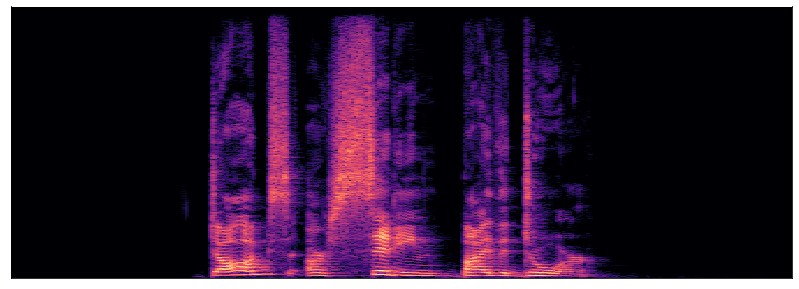

In [32]:
x, sr = librosa.load(ravdess_dataframe.iloc[0]['Paths'], sr=44100)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sr)
plt.savefig("out.png")